In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import random

In [2]:
def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASHEED'] = str(seed)
  np.random.seed(seed)
seed_everything(42)

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submit = pd.read_csv("./submit.csv")

In [4]:
train.head(5)

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [5]:
test.head(5)

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [6]:
submit.head(5)

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,1.462200,1.192973,1.138615,12.952805,30.971239,16.261593,3.209757,-26.133187,-26.148061,-22.172857,24.463823,-26.078327,-26.071199,-26.087317
1,TEST_00002,1.500052,1.218114,1.147487,13.167588,30.887591,16.507907,3.188970,-26.113221,-26.122922,-22.263707,24.407033,-26.056742,-26.052479,-26.067898
2,TEST_00003,1.382944,1.067200,1.021300,14.608024,31.843679,16.224268,3.049995,-26.059612,-26.079587,-22.348805,24.457127,-26.006036,-26.002194,-26.010814
3,TEST_00004,1.353563,1.044562,0.966873,15.251977,32.197070,16.598532,2.987221,-26.076495,-26.095588,-22.209871,24.489625,-26.024492,-26.022156,-26.031402
4,TEST_00005,1.314087,0.958506,0.934164,14.378596,31.146313,16.356404,3.159202,-26.190404,-26.209675,-22.526759,24.217356,-26.136029,-26.127112,-26.140593


In [7]:
x_feature_info = pd.read_csv("./meta/x_feature_info.csv")

In [8]:
x_feature_info

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


In [9]:
y_feature_info = pd.read_csv("./meta/y_feature_info.csv")
y_feature_info

,Feature,설명
0,Y_01,안테나 Gain 평균 (각도1)
1,Y_02,안테나 1 Gain 편차
2,Y_03,안테나 2 Gain 편차
3,Y_04,평균 신호대 잡음비
4,Y_05,안테나 Gain 평균 (각도2)
5,Y_06,신호대 잡음비 (각도1)
6,Y_07,안테나 Gain 평균 (각도3)
7,Y_08,신호대 잡음비 (각도2)
8,Y_09,신호대 잡음비 (각도3)
9,Y_10,신호대 잡음비 (각도4)


In [10]:
y_feature_spec_info = pd.read_csv("./meta/y_feature_spec_info.csv")
y_feature_spec_info

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


In [11]:
train_x = train.filter(regex='X')
train_y = train.filter(regex='Y')

In [12]:
submit_df = test[['ID']]

In [13]:
#test_x
test = pd.read_csv("./test.csv").drop(columns = ['ID'])
test.head(5)

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


# Dataset 구성 - Feature engineering
Concept: 모델의 예측을 방해하는 의미가 덜한 Feature을 줄여보자.
- 컬럼 수 줄이기. 비슷한 수치를 갖는 컬럼은 평균으로 합쳐보자
    - 학습 시 부여되는 가중치(weight)를 다르게 할 수 있지 않을까
- 하나의 컬럼이 한 종류의 Feature을 대표할 수 있도록 구성해 보자. (Feature 총 56개 컬럼 -> 16개 컬럼으로)

## X(feature) 데이터 묶음: 17groups
-> EDA 이후 1group 탈락, 16groups로 modeling

PCB 체결 시 단계별 누름량
-> EDA 결과에 따라 2 제거, 1과 6은 평균 계산 후 적용

In [14]:
temp = train_x[['X_01', 'X_06']].mean(axis=1)
x_group_01 = pd.concat([temp, train_x[['X_05']]], axis=1)
x_group_01

,0,X_05
0,72.7635,101.892
1,71.2335,101.944
2,72.7630,103.153
3,74.2925,101.971
4,70.2140,101.981
...,...,...
39602,66.6450,103.150
39603,66.6450,102.021
39604,68.6840,103.144
39605,67.1550,102.025


방열 재료 무게
-> EDA 결과에 따라 10, 11 제거

In [15]:
x_group_02 = train_x[['X_03']]
x_group_02

,X_03
0,67.47
1,65.17
2,64.07
3,67.57
4,63.57
...,...
39602,62.27
39603,62.77
39604,64.67
39605,63.67


방열 재료 면적 -> 모두 유지

In [16]:
x_group_03 = train_x[['X_07','X_08','X_09']]
x_group_03

,X_07,X_08,X_09
0,29.45,62.38,245.71
1,28.73,61.23,233.61
2,28.81,105.77,272.20
3,28.92,115.21,255.36
4,29.68,103.38,241.46
...,...,...,...
39602,30.20,77.83,298.05
39603,29.21,102.25,270.67
39604,29.96,102.61,198.07
39605,30.30,112.60,275.52


검사 통과 여부 -> 모두 제거

In [17]:
train_x[['X_04','X_23','X_47','X_48']]

,X_04,X_23,X_47,X_48
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
39602,1,1,1,1
39603,1,1,1,1
39604,1,1,1,1
39605,1,1,1,1


커넥터 위치 기준 좌표 -> 유지

In [18]:
x_group_04 = train_x[['X_12']]
x_group_04

,X_12
0,4.34
1,4.38
2,4.36
3,4.33
4,4.35
...,...
39602,4.36
39603,4.40
39604,4.38
39605,4.33


안테나 패드 위치 차이 -> 유지

In [19]:
x_group_05 = train_x[['X_13']]
x_group_05

,X_13
0,0.18
1,0.18
2,0.15
3,0.21
4,0.16
...,...
39602,0.15
39603,0.13
39604,0.14
39605,0.16


안테나 패드 위치 -> 평균값 적용

In [20]:
x_group_06 = train_x[['X_14','X_15','X_16','X_17']].mean(axis=1).to_frame(name='X_14')
x_group_06

,X_14
0,13.4075
1,13.4075
2,13.4050
3,13.3825
4,13.4000
...,...
39602,13.4450
39603,13.4200
39604,13.4400
39605,13.4275


스크류 삽입 깊이 -> 평균값 적용

In [21]:
x_group_07 = train_x[['X_19','X_20','X_21','X_22']].mean(axis=1).to_frame(name='X_19')
x_group_07

,X_19
0,3.1175
1,3.0475
2,3.0525
3,3.0400
4,3.0575
...,...
39602,3.1050
39603,3.0800
39604,3.1275
39605,3.1075


커넥터 핀 치수 -> 평균값 적용

In [22]:
x_group_08 = train_x[['X_24','X_25','X_26','X_27','X_28','X_29']].mean(axis=1).to_frame(name='X_24')
x_group_08

,X_24
0,2.106667
1,2.141667
2,2.100000
3,2.065000
4,2.136667
...,...
39602,2.116667
39603,2.126667
39604,2.108333
39605,2.070000


스크류 삽입 깊이 -> 평균값 적용

In [23]:
x_group_09 = train_x[['X_30','X_31','X_32','X_33']].mean(axis=1).to_frame(name='X_30')
x_group_09

,X_30
0,1.5950
1,1.5675
2,1.5800
3,1.5750
4,1.6150
...,...
39602,1.5000
39603,1.5550
39604,1.4875
39605,1.4900


스크류 체결 시 분당 회전수 -> 평균값 적용

In [24]:
x_group_10 = train_x[['X_34','X_35','X_36','X_37']].mean(axis=1).to_frame(name='X_34')
x_group_10

,X_34
0,12.9375
1,12.9025
2,12.9275
3,12.9475
4,12.9200
...,...
39602,12.9325
39603,12.8775
39604,12.9375
39605,12.9350


하우징 PCB 안착부 치수 -> 평균값 적용

In [25]:
x_group_11 = train_x[['X_38','X_39','X_40']].mean(axis=1).to_frame(name='X_38')
x_group_11

,X_38
0,-16.600000
1,-16.303333
2,-16.363333
3,-16.250000
4,-16.443333
...,...
39602,-16.343333
39603,-15.946667
39604,-16.370000
39605,-16.563333


레이돔 치수 -> 평균값 적용

In [26]:
x_group_12 = train_x[['X_41','X_42','X_43','X_44']].mean(axis=1).to_frame(name='X_41')
x_group_12

,X_41
0,21.1400
1,21.1200
2,21.1125
3,21.1125
4,21.1000
...,...
39602,21.1575
39603,21.1625
39604,21.1675
39605,21.1225


In [27]:
x_group_13 = train_x[['X_45']]
x_group_13

,X_45
0,0.29
1,0.13
2,0.14
3,0.22
4,0.22
...,...
39602,0.11
39603,0.12
39604,0.13
39605,0.11


In [28]:
x_group_14 = train_x[['X_46']]
x_group_14

,X_46
0,1463
1,1463
2,1468
3,1469
4,1469
...,...
39602,1469
39603,1458
39604,1459
39605,1469


In [29]:
x_group_15 = train_x[['X_49']]
x_group_15

,X_49
0,9706.03
1,10423.43
2,10948.53
3,15007.03
4,11051.03
...,...
39602,60630.73
39603,60763.43
39604,8813.33
39605,62222.33


RF 부분 SMT 납 량 -> 평균값 적용

In [30]:
x_group_16 = train_x[['X_50','X_51','X_52','X_53','X_54','X_55','X_56']].mean(axis=1).to_frame(name='X_50')
x_group_16

,X_50
0,134.558480
1,134.195012
2,132.751463
3,136.083197
4,133.887780
...,...
39602,129.159802
39603,128.830758
39604,131.929307
39605,129.680526


## Y(target) 데이터 묶음: 4groups

In [31]:
#안테나 Gain 평균 (4개 각도별)
y_group_01 = train_y[['Y_01', 'Y_05', 'Y_07', 'Y_11']]
y_group_01

,Y_01,Y_05,Y_07,Y_11
0,2.056,29.632,4.276,23.792
1,1.446,33.179,3.229,24.691
2,1.251,31.801,2.839,24.649
3,1.464,34.503,3.144,24.913
4,0.983,32.602,3.138,25.299
...,...,...,...,...
39602,1.382,29.194,3.410,24.261
39603,1.482,29.859,3.406,23.427
39604,1.117,24.720,3.215,24.301
39605,0.895,26.412,4.216,23.305


In [32]:
#안테나 Gain 편차
y_group_02 = train_y[['Y_02', 'Y_03']]
y_group_02

,Y_02,Y_03
0,1.456,1.680
1,1.184,1.268
2,0.665,0.782
3,1.079,1.052
4,0.646,0.689
...,...,...
39602,1.215,1.263
39603,0.606,1.083
39604,1.154,0.993
39605,0.187,0.477


In [33]:
#평균 신호대 잡음비
y_group_03 = train_y[['Y_04']]
y_group_03

,Y_04
0,10.502
1,18.507
2,14.082
3,16.975
4,15.047
...,...
39602,10.874
39603,8.759
39604,13.159
39605,9.123


In [34]:
#신호대 잡음비 (7개 각도별)
y_group_04 = train_y[['Y_06', 'Y_08', 'Y_09', 'Y_10', 'Y_12', 'Y_13', 'Y_14']]
y_group_04

,Y_06,Y_08,Y_09,Y_10,Y_12,Y_13,Y_14
0,16.083,-25.381,-25.529,-22.769,-25.470,-25.409,-25.304
1,16.736,-26.619,-26.523,-22.574,-26.253,-26.497,-26.438
2,17.080,-26.238,-26.216,-22.169,-26.285,-26.215,-26.370
3,17.143,-25.426,-25.079,-21.765,-25.254,-25.021,-25.345
4,17.569,-25.376,-25.242,-21.072,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...
39602,16.582,-26.486,-26.581,-22.772,-26.491,-26.584,-26.580
39603,15.659,-27.308,-27.203,-24.674,-27.250,-27.334,-27.325
39604,16.823,-26.502,-26.687,-22.577,-26.388,-26.425,-26.601
39605,15.757,-26.760,-26.634,-24.066,-26.536,-26.751,-26.635


# EDA
https://dacon.io/competitions/official/235927/codeshare/6052?page=1&dtype=recent 참고해 진행

## Test 데이터도 같은 형식으로 구성

In [35]:
temp = test[['X_01', 'X_06']].mean(axis=1)
x_test_group_01 = pd.concat([temp, test[['X_05']]], axis=1)
x_test_group_01

,0,X_05
0,71.2335,101.867
1,67.6650,101.992
2,73.2730,101.884
3,71.7435,101.866
4,74.2930,101.891
...,...,...
39603,68.6840,103.157
39604,68.6840,103.137
39605,69.7040,103.149
39606,67.6650,103.148


In [36]:
x_test_group_02 = test[['X_03']]
x_test_group_02

,X_03
0,76.67
1,69.37
2,68.97
3,65.87
4,66.67
...,...
39603,63.97
39604,61.37
39605,63.67
39606,61.77


In [37]:
x_test_group_03 = test[['X_07','X_08','X_09']]
x_test_group_03

,X_07,X_08,X_09
0,30.51,63.57,239.80
1,28.03,116.99,189.23
2,29.65,205.68,214.93
3,28.15,103.38,180.80
4,29.92,71.20,231.93
...,...,...,...
39603,29.49,116.35,284.16
39604,32.29,116.28,272.41
39605,30.00,113.05,295.54
39606,32.05,115.05,267.26


In [38]:
test[['X_04','X_23','X_47','X_48']]

,X_04,X_23,X_47,X_48
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
39603,1,1,1,1
39604,1,1,1,1
39605,1,1,1,1
39606,1,1,1,1


In [39]:
x_test_group_04 = test[['X_12']]
x_test_group_04

,X_12
0,4.37
1,4.36
2,4.43
3,4.39
4,4.38
...,...
39603,4.35
39604,4.34
39605,4.38
39606,4.37


안테나 패드 위치 차이 -> 유지

In [40]:
x_test_group_05 = test[['X_13']]
x_test_group_05

,X_13
0,0.15
1,0.17
2,0.20
3,0.18
4,0.12
...,...
39603,0.14
39604,0.16
39605,0.16
39606,0.16


안테나 패드 위치 -> 평균값 적용

In [41]:
x_test_group_06 = test[['X_14','X_15','X_16','X_17']].mean(axis=1).to_frame(name='X_14')
x_test_group_06

,X_14
0,13.4525
1,13.4250
2,13.3975
3,13.4025
4,13.4300
...,...
39603,13.4350
39604,13.4375
39605,13.4250
39606,13.4425


스크류 삽입 깊이 -> 평균값 적용

In [42]:
x_test_group_07 = test[['X_19','X_20','X_21','X_22']].mean(axis=1).to_frame(name='X_19')
x_test_group_07

,X_19
0,3.2900
1,3.2675
2,3.1025
3,3.1700
4,3.1525
...,...
39603,3.0950
39604,3.0775
39605,3.0900
39606,3.0825


커넥터 핀 치수 -> 평균값 적용

In [43]:
x_test_group_08 = test[['X_24','X_25','X_26','X_27','X_28','X_29']].mean(axis=1).to_frame(name='X_24')
x_test_group_08

,X_24
0,2.228333
1,2.130000
2,2.195000
3,2.110000
4,2.121667
...,...
39603,2.108333
39604,2.076667
39605,2.118333
39606,2.126667


스크류 삽입 깊이 -> 평균값 적용

In [44]:
x_test_group_09 = test[['X_30','X_31','X_32','X_33']].mean(axis=1).to_frame(name='X_30')
x_test_group_09

,X_30
0,1.4425
1,1.4525
2,1.5925
3,1.6250
4,1.5850
...,...
39603,1.4875
39604,1.5100
39605,1.5225
39606,1.4750


스크류 체결 시 분당 회전수 -> 평균값 적용

In [45]:
x_test_group_10 = test[['X_34','X_35','X_36','X_37']].mean(axis=1).to_frame(name='X_34')
x_test_group_10

,X_34
0,12.9400
1,12.9275
2,12.9650
3,12.9600
4,12.9625
...,...
39603,12.9475
39604,12.9650
39605,12.9325
39606,12.9650


하우징 PCB 안착부 치수 -> 평균값 적용

In [46]:
x_test_group_11 = test[['X_38','X_39','X_40']].mean(axis=1).to_frame(name='X_38')
x_test_group_11

,X_38
0,-16.393333
1,-15.536667
2,-16.523333
3,-16.313333
4,-16.330000
...,...
39603,-16.436667
39604,-16.313333
39605,-16.493333
39606,-16.236667


레이돔 치수 -> 평균값 적용

In [47]:
x_test_group_12 = test[['X_41','X_42','X_43','X_44']].mean(axis=1).to_frame(name='X_41')
x_test_group_12

,X_41
0,21.1725
1,21.1525
2,21.1375
3,21.1200
4,21.1300
...,...
39603,21.1800
39604,21.1325
39605,21.1675
39606,21.1700


In [48]:
x_test_group_13 = test[['X_45']]
x_test_group_13

,X_45
0,0.16
1,0.27
2,0.14
3,0.13
4,0.09
...,...
39603,0.11
39604,0.19
39605,0.12
39606,0.11


In [49]:
x_test_group_14 = test[['X_46']]
x_test_group_14

,X_46
0,1469
1,1462
2,1469
3,1469
4,1469
...,...
39603,1469
39604,1469
39605,1469
39606,1469


In [50]:
x_test_group_15 = test[['X_49']]
x_test_group_15

,X_49
0,17227.63
1,17134.53
2,14860.83
3,15252.53
4,10752.23
...,...
39603,62123.53
39604,61844.13
39605,60277.53
39606,60236.73


In [51]:
x_test_group_16 = test[['X_50','X_51','X_52','X_53','X_54','X_55','X_56']].mean(axis=1).to_frame(name='X_50')
x_test_group_16

,X_50
0,132.462027
1,133.106058
2,123.680946
3,131.704815
4,133.498852
...,...
39603,130.768705
39604,129.450490
39605,129.347093
39606,128.045098


# Modeling
Try2,3에서와 동일하게 Pycaret 모델링

In [52]:
feature_set = pd.concat([x_group_01, x_group_02, x_group_03, x_group_04, x_group_05, x_group_06, x_group_07, x_group_08, x_group_09, x_group_10, x_group_11, x_group_12, x_group_13, x_group_14, x_group_15, x_group_16], axis=1)
feature_set

,0,X_05,X_03,X_07,X_08,X_09,X_12,X_13,X_14,X_19,X_24,X_30,X_34,X_38,X_41,X_45,X_46,X_49,X_50
0,72.7635,101.892,67.47,29.45,62.38,245.71,4.34,0.18,13.4075,3.1175,2.106667,1.5950,12.9375,-16.600000,21.1400,0.29,1463,9706.03,134.558480
1,71.2335,101.944,65.17,28.73,61.23,233.61,4.38,0.18,13.4075,3.0475,2.141667,1.5675,12.9025,-16.303333,21.1200,0.13,1463,10423.43,134.195012
2,72.7630,103.153,64.07,28.81,105.77,272.20,4.36,0.15,13.4050,3.0525,2.100000,1.5800,12.9275,-16.363333,21.1125,0.14,1468,10948.53,132.751463
3,74.2925,101.971,67.57,28.92,115.21,255.36,4.33,0.21,13.3825,3.0400,2.065000,1.5750,12.9475,-16.250000,21.1125,0.22,1469,15007.03,136.083197
4,70.2140,101.981,63.57,29.68,103.38,241.46,4.35,0.16,13.4000,3.0575,2.136667,1.6150,12.9200,-16.443333,21.1000,0.22,1469,11051.03,133.887780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.6450,103.150,62.27,30.20,77.83,298.05,4.36,0.15,13.4450,3.1050,2.116667,1.5000,12.9325,-16.343333,21.1575,0.11,1469,60630.73,129.159802
39603,66.6450,102.021,62.77,29.21,102.25,270.67,4.40,0.13,13.4200,3.0800,2.126667,1.5550,12.8775,-15.946667,21.1625,0.12,1458,60763.43,128.830758
39604,68.6840,103.144,64.67,29.96,102.61,198.07,4.38,0.14,13.4400,3.1275,2.108333,1.4875,12.9375,-16.370000,21.1675,0.13,1459,8813.33,131.929307
39605,67.1550,102.025,63.67,30.30,112.60,275.52,4.33,0.16,13.4275,3.1075,2.070000,1.4900,12.9350,-16.563333,21.1225,0.11,1469,62222.33,129.680526


In [53]:
test = pd.concat([x_test_group_01, x_test_group_02, x_test_group_03, x_test_group_04, x_test_group_05, x_test_group_06, x_test_group_07, x_test_group_08, x_test_group_09, x_test_group_10, x_test_group_11, x_test_group_12, x_test_group_13, x_test_group_14, x_test_group_15, x_test_group_16], axis=1)
test

,0,X_05,X_03,X_07,X_08,X_09,X_12,X_13,X_14,X_19,X_24,X_30,X_34,X_38,X_41,X_45,X_46,X_49,X_50
0,71.2335,101.867,76.67,30.51,63.57,239.80,4.37,0.15,13.4525,3.2900,2.228333,1.4425,12.9400,-16.393333,21.1725,0.16,1469,17227.63,132.462027
1,67.6650,101.992,69.37,28.03,116.99,189.23,4.36,0.17,13.4250,3.2675,2.130000,1.4525,12.9275,-15.536667,21.1525,0.27,1462,17134.53,133.106058
2,73.2730,101.884,68.97,29.65,205.68,214.93,4.43,0.20,13.3975,3.1025,2.195000,1.5925,12.9650,-16.523333,21.1375,0.14,1469,14860.83,123.680946
3,71.7435,101.866,65.87,28.15,103.38,180.80,4.39,0.18,13.4025,3.1700,2.110000,1.6250,12.9600,-16.313333,21.1200,0.13,1469,15252.53,131.704815
4,74.2930,101.891,66.67,29.92,71.20,231.93,4.38,0.12,13.4300,3.1525,2.121667,1.5850,12.9625,-16.330000,21.1300,0.09,1469,10752.23,133.498852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,68.6840,103.157,63.97,29.49,116.35,284.16,4.35,0.14,13.4350,3.0950,2.108333,1.4875,12.9475,-16.436667,21.1800,0.11,1469,62123.53,130.768705
39604,68.6840,103.137,61.37,32.29,116.28,272.41,4.34,0.16,13.4375,3.0775,2.076667,1.5100,12.9650,-16.313333,21.1325,0.19,1469,61844.13,129.450490
39605,69.7040,103.149,63.67,30.00,113.05,295.54,4.38,0.16,13.4250,3.0900,2.118333,1.5225,12.9325,-16.493333,21.1675,0.12,1469,60277.53,129.347093
39606,67.6650,103.148,61.77,32.05,115.05,267.26,4.37,0.16,13.4425,3.0825,2.126667,1.4750,12.9650,-16.236667,21.1700,0.11,1469,60236.73,128.045098


In [54]:
train_y01 = feature_set.copy()
train_y02 = feature_set.copy()
train_y03 = feature_set.copy()
train_y04 = feature_set.copy()
train_y05 = feature_set.copy()
train_y06 = feature_set.copy()
train_y07 = feature_set.copy()
train_y08 = feature_set.copy()
train_y09 = feature_set.copy()
train_y10 = feature_set.copy()
train_y11 = feature_set.copy()
train_y12 = feature_set.copy()
train_y13 = feature_set.copy()
train_y14 = feature_set.copy()

In [55]:
train_y01['Y_01'] = train['Y_01']
train_y02['Y_02'] = train['Y_02']
train_y03['Y_03'] = train['Y_03']
train_y04['Y_04'] = train['Y_04']
train_y05['Y_05'] = train['Y_05']
train_y06['Y_06'] = train['Y_06']
train_y07['Y_07'] = train['Y_07']
train_y08['Y_08'] = train['Y_08']
train_y09['Y_09'] = train['Y_09']
train_y10['Y_10'] = train['Y_10']
train_y11['Y_11'] = train['Y_11']
train_y12['Y_12'] = train['Y_12']
train_y13['Y_13'] = train['Y_13']
train_y14['Y_14'] = train['Y_14']

In [56]:
train_y14

,0,X_05,X_03,X_07,X_08,X_09,X_12,X_13,X_14,X_19,X_24,X_30,X_34,X_38,X_41,X_45,X_46,X_49,X_50,Y_14
0,72.7635,101.892,67.47,29.45,62.38,245.71,4.34,0.18,13.4075,3.1175,2.106667,1.5950,12.9375,-16.600000,21.1400,0.29,1463,9706.03,134.558480,-25.304
1,71.2335,101.944,65.17,28.73,61.23,233.61,4.38,0.18,13.4075,3.0475,2.141667,1.5675,12.9025,-16.303333,21.1200,0.13,1463,10423.43,134.195012,-26.438
2,72.7630,103.153,64.07,28.81,105.77,272.20,4.36,0.15,13.4050,3.0525,2.100000,1.5800,12.9275,-16.363333,21.1125,0.14,1468,10948.53,132.751463,-26.370
3,74.2925,101.971,67.57,28.92,115.21,255.36,4.33,0.21,13.3825,3.0400,2.065000,1.5750,12.9475,-16.250000,21.1125,0.22,1469,15007.03,136.083197,-25.345
4,70.2140,101.981,63.57,29.68,103.38,241.46,4.35,0.16,13.4000,3.0575,2.136667,1.6150,12.9200,-16.443333,21.1000,0.22,1469,11051.03,133.887780,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.6450,103.150,62.27,30.20,77.83,298.05,4.36,0.15,13.4450,3.1050,2.116667,1.5000,12.9325,-16.343333,21.1575,0.11,1469,60630.73,129.159802,-26.580
39603,66.6450,102.021,62.77,29.21,102.25,270.67,4.40,0.13,13.4200,3.0800,2.126667,1.5550,12.8775,-15.946667,21.1625,0.12,1458,60763.43,128.830758,-27.325
39604,68.6840,103.144,64.67,29.96,102.61,198.07,4.38,0.14,13.4400,3.1275,2.108333,1.4875,12.9375,-16.370000,21.1675,0.13,1459,8813.33,131.929307,-26.601
39605,67.1550,102.025,63.67,30.30,112.60,275.52,4.33,0.16,13.4275,3.1075,2.070000,1.4900,12.9350,-16.563333,21.1225,0.11,1469,62222.33,129.680526,-26.635


In [57]:
from pycaret.regression import *

In [58]:
reg101 = setup(data = train_y01, target = 'Y_01')

,Description,Value
0,Session id,1974
1,Target,Y_01
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [59]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2695,0.1222,0.3496,0.0446,0.1531,0.2801,0.2370
gbr,Gradient Boosting Regressor,0.2697,0.1226,0.3501,0.0417,0.1535,0.2849,0.7760
rf,Random Forest Regressor,0.2705,0.1230,0.3507,0.0385,0.1536,0.2799,3.1330
et,Extra Trees Regressor,0.2703,0.1234,0.3512,0.0357,0.1539,0.2840,1.1760
lr,Linear Regression,0.2738,0.1259,0.3548,0.0162,0.1557,0.2917,0.2390
ridge,Ridge Regression,0.2738,0.1259,0.3547,0.0162,0.1557,0.2917,0.0260
lar,Least Angle Regression,0.2738,0.1259,0.3548,0.0162,0.1557,0.2917,0.0250
br,Bayesian Ridge,0.2738,0.1259,0.3548,0.0162,0.1557,0.2917,0.0310
omp,Orthogonal Matching Pursuit,0.2760,0.1278,0.3575,0.0010,0.1568,0.2931,0.0220
lasso,Lasso Regression,0.2761,0.1279,0.3575,0.0007,0.1568,0.2932,0.0240


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2664,0.1179,0.3434,0.0507,0.1509,0.2488
1,0.2695,0.1237,0.3516,0.0498,0.1561,0.3348
2,0.2710,0.1226,0.3502,0.0423,0.1541,0.2972
3,0.2705,0.1219,0.3492,0.0551,0.1543,0.2697
4,0.2628,0.1174,0.3426,0.0577,0.1491,0.2798
5,0.2700,0.1239,0.3519,0.0399,0.1551,0.2973
6,0.2675,0.1200,0.3464,0.0415,0.1506,0.2687
7,0.2745,0.1291,0.3593,0.0479,0.1574,0.3249
8,0.2703,0.1228,0.3504,0.0441,0.1525,0.2605


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [60]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2664,0.1179,0.3434,0.0507,0.1509,0.2488
1,0.2695,0.1237,0.3516,0.0498,0.1561,0.3348
2,0.2710,0.1226,0.3502,0.0423,0.1541,0.2972
3,0.2705,0.1219,0.3492,0.0551,0.1543,0.2697
4,0.2628,0.1174,0.3426,0.0577,0.1491,0.2798
5,0.2700,0.1239,0.3519,0.0399,0.1551,0.2973
6,0.2675,0.1200,0.3464,0.0415,0.1506,0.2687
7,0.2745,0.1291,0.3593,0.0479,0.1574,0.3249
8,0.2703,0.1228,0.3504,0.0441,0.1525,0.2605


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [61]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2662,0.1180,0.3434,0.0504,0.1509,0.2490
1,0.2692,0.1229,0.3506,0.0555,0.1556,0.3339
2,0.2706,0.1227,0.3503,0.0418,0.1541,0.2972
3,0.2695,0.1216,0.3487,0.0577,0.1542,0.2708
4,0.2632,0.1178,0.3432,0.0542,0.1494,0.2832
5,0.2697,0.1239,0.3519,0.0399,0.1552,0.2994
6,0.2676,0.1199,0.3463,0.0419,0.1506,0.2696
7,0.2739,0.1287,0.3588,0.0509,0.1572,0.3240
8,0.2705,0.1232,0.3510,0.0411,0.1528,0.2623


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1974)),
                                                            ('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=1974))],
                                                n_jobs=-1),
                 random_state=1974)

Finished loading model, total used 100 iterations


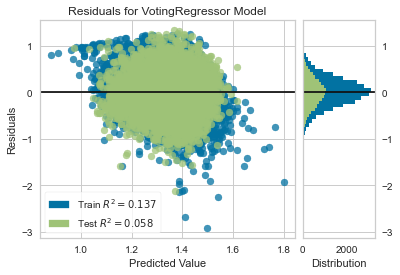

In [62]:
plot_model(tuned_blender)

In [63]:
predict_model(tuned_blender, data=test)

,0,X_05,X_03,X_07,X_08,X_09,X_12,X_13,X_14,X_19,X_24,X_30,X_34,X_38,X_41,X_45,X_46,X_49,X_50,prediction_label
0,71.233498,101.866997,76.669998,30.510000,63.570000,239.800003,4.37,0.15,13.4525,3.2900,2.228333,1.4425,12.9400,-16.393333,21.172501,0.16,1469.0,17227.630859,132.462021,1.428304
1,67.665001,101.991997,69.370003,28.030001,116.989998,189.229996,4.36,0.17,13.4250,3.2675,2.130000,1.4525,12.9275,-15.536667,21.152500,0.27,1462.0,17134.529297,133.106064,1.464748
2,73.273003,101.884003,68.970001,29.650000,205.679993,214.929993,4.43,0.20,13.3975,3.1025,2.195000,1.5925,12.9650,-16.523333,21.137501,0.14,1469.0,14860.830078,123.680946,1.474881
3,71.743500,101.865997,65.870003,28.150000,103.379997,180.800003,4.39,0.18,13.4025,3.1700,2.110000,1.6250,12.9600,-16.313334,21.120001,0.13,1469.0,15252.530273,131.704819,1.440899
4,74.292999,101.890999,66.669998,29.920000,71.199997,231.929993,4.38,0.12,13.4300,3.1525,2.121667,1.5850,12.9625,-16.330000,21.129999,0.09,1469.0,10752.230469,133.498856,1.375893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,68.683998,103.156998,63.970001,29.490000,116.349998,284.160004,4.35,0.14,13.4350,3.0950,2.108333,1.4875,12.9475,-16.436666,21.180000,0.11,1469.0,62123.531250,130.768707,1.237612
39604,68.683998,103.137001,61.369999,32.290001,116.279999,272.410004,4.34,0.16,13.4375,3.0775,2.076667,1.5100,12.9650,-16.313334,21.132500,0.19,1469.0,61844.128906,129.450485,1.308244
39605,69.704002,103.149002,63.669998,30.000000,113.050003,295.540009,4.38,0.16,13.4250,3.0900,2.118333,1.5225,12.9325,-16.493334,21.167500,0.12,1469.0,60277.531250,129.347092,1.234428
39606,67.665001,103.148003,61.770000,32.049999,115.050003,267.260010,4.37,0.16,13.4425,3.0825,2.126667,1.4750,12.9650,-16.236666,21.170000,0.11,1469.0,60236.730469,128.045105,1.232624


In [64]:
submit_df['Y_01'] = predict_model(tuned_blender, data=test)['prediction_label']

In [65]:
reg102 = setup(data = train_y02, target = 'Y_02')

,Description,Value
0,Session id,559
1,Target,Y_02
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [66]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2980,0.1432,0.3784,0.0420,0.1874,0.5343,0.3220
gbr,Gradient Boosting Regressor,0.2979,0.1433,0.3785,0.0415,0.1876,0.5450,1.0720
rf,Random Forest Regressor,0.2991,0.1442,0.3798,0.0349,0.1883,0.5407,3.3910
et,Extra Trees Regressor,0.2991,0.1444,0.3799,0.0339,0.1884,0.5452,1.3030
lr,Linear Regression,0.3011,0.1460,0.3820,0.0234,0.1895,0.5597,0.0720
ridge,Ridge Regression,0.3011,0.1460,0.3820,0.0234,0.1895,0.5598,0.0300
lar,Least Angle Regression,0.3011,0.1460,0.3820,0.0234,0.1895,0.5597,0.0320
br,Bayesian Ridge,0.3011,0.1460,0.3820,0.0234,0.1895,0.5598,0.0320
omp,Orthogonal Matching Pursuit,0.3034,0.1479,0.3846,0.0102,0.1909,0.5631,0.0320
lasso,Lasso Regression,0.3051,0.1493,0.3864,0.0009,0.1918,0.5569,0.0350


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2997,0.1429,0.3781,0.0444,0.1890,0.5263
1,0.2925,0.1410,0.3754,0.0342,0.1854,0.5139
2,0.2989,0.1460,0.3821,0.0470,0.1880,0.5289
3,0.2945,0.1359,0.3687,0.0498,0.1843,0.5287
4,0.2981,0.1456,0.3815,0.0491,0.1881,0.5727
5,0.2952,0.1405,0.3749,0.0473,0.1851,0.5503
6,0.2980,0.1412,0.3757,0.0420,0.1867,0.5488
7,0.3064,0.1514,0.3891,0.0334,0.1925,0.5023
8,0.2942,0.1403,0.3745,0.0649,0.1851,0.5213


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [67]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2997,0.1429,0.3781,0.0444,0.1890,0.5263
1,0.2925,0.1410,0.3754,0.0342,0.1854,0.5139
2,0.2989,0.1460,0.3821,0.0470,0.1880,0.5289
3,0.2945,0.1359,0.3687,0.0498,0.1843,0.5287
4,0.2981,0.1456,0.3815,0.0491,0.1881,0.5727
5,0.2952,0.1405,0.3749,0.0473,0.1851,0.5503
6,0.2980,0.1412,0.3757,0.0420,0.1867,0.5488
7,0.3064,0.1514,0.3891,0.0334,0.1925,0.5023
8,0.2942,0.1403,0.3745,0.0649,0.1851,0.5213


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [68]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2996,0.1429,0.3780,0.0448,0.1889,0.5281
1,0.2922,0.1405,0.3748,0.0375,0.1851,0.5161
2,0.2984,0.1456,0.3815,0.0501,0.1876,0.5287
3,0.2941,0.1356,0.3682,0.0521,0.1841,0.5342
4,0.2991,0.1463,0.3825,0.0444,0.1885,0.5744
5,0.2945,0.1401,0.3743,0.0501,0.1847,0.5481
6,0.2978,0.1410,0.3755,0.0428,0.1866,0.5522
7,0.3063,0.1514,0.3892,0.0329,0.1925,0.5044
8,0.2939,0.1405,0.3748,0.0637,0.1853,0.5285


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=559)),
                                                            ('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=559))],
                                                n_jobs=-1),
                 random_state=559)

In [69]:
submit_df['Y_02'] = predict_model(tuned_blender, data=test)['prediction_label']

In [70]:
reg103 = setup(data = train_y03, target = 'Y_03')

,Description,Value
0,Session id,4656
1,Target,Y_03
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [71]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2792,0.1267,0.3559,0.0353,0.1782,0.3974,0.0900
gbr,Gradient Boosting Regressor,0.2793,0.1268,0.3561,0.0340,0.1785,0.4016,1.0260
rf,Random Forest Regressor,0.2803,0.1273,0.3568,0.0301,0.1789,0.4002,3.2090
et,Extra Trees Regressor,0.2805,0.1277,0.3573,0.0277,0.1792,0.4033,1.2820
ridge,Ridge Regression,0.2825,0.1294,0.3597,0.0144,0.1805,0.4102,0.0280
lr,Linear Regression,0.2825,0.1294,0.3597,0.0143,0.1805,0.4101,0.0760
lar,Least Angle Regression,0.2825,0.1294,0.3597,0.0143,0.1805,0.4101,0.0310
br,Bayesian Ridge,0.2825,0.1294,0.3597,0.0143,0.1805,0.4102,0.0370
omp,Orthogonal Matching Pursuit,0.2845,0.1309,0.3618,0.0031,0.1816,0.4138,0.0310
lasso,Lasso Regression,0.2847,0.1311,0.3621,0.0015,0.1818,0.4137,0.0310


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2781,0.1253,0.3540,0.0433,0.1779,0.4121
1,0.2816,0.1268,0.3561,0.0337,0.1789,0.3912
2,0.2777,0.1277,0.3573,0.0286,0.1793,0.4319
3,0.2751,0.1218,0.3490,0.0398,0.1762,0.3963
4,0.2769,0.1264,0.3555,0.0444,0.1779,0.4232
5,0.2811,0.1295,0.3599,0.0422,0.1780,0.3718
6,0.2787,0.1260,0.3550,0.0413,0.1773,0.3954
7,0.2769,0.1240,0.3522,0.0385,0.1763,0.3869
8,0.2812,0.1285,0.3584,0.0411,0.1793,0.3801


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [72]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2781,0.1253,0.3540,0.0433,0.1779,0.4121
1,0.2816,0.1268,0.3561,0.0337,0.1789,0.3912
2,0.2777,0.1277,0.3573,0.0286,0.1793,0.4319
3,0.2751,0.1218,0.3490,0.0398,0.1762,0.3963
4,0.2769,0.1264,0.3555,0.0444,0.1779,0.4232
5,0.2811,0.1295,0.3599,0.0422,0.1780,0.3718
6,0.2787,0.1260,0.3550,0.0413,0.1773,0.3954
7,0.2769,0.1240,0.3522,0.0385,0.1763,0.3869
8,0.2812,0.1285,0.3584,0.0411,0.1793,0.3801


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [73]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2785,0.1255,0.3543,0.0418,0.1781,0.4150
1,0.2814,0.1269,0.3562,0.0329,0.1790,0.3909
2,0.2775,0.1271,0.3565,0.0330,0.1790,0.4321
3,0.2748,0.1216,0.3487,0.0412,0.1762,0.3975
4,0.2770,0.1263,0.3554,0.0450,0.1779,0.4271
5,0.2816,0.1296,0.3600,0.0412,0.1782,0.3755
6,0.2784,0.1261,0.3551,0.0407,0.1774,0.3954
7,0.2773,0.1242,0.3524,0.0373,0.1764,0.3885
8,0.2812,0.1284,0.3583,0.0417,0.1792,0.3805


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=4656)),
                                                            ('Gradient '
                                                             'Boosting '
                                                             'Regressor',
                                                             GradientBoostingRegressor(random_state=4656))],
                                                n_jobs=-1),
                 random_state=4656)

In [74]:
submit_df['Y_03'] = predict_model(tuned_blender, data=test)['prediction_label']

In [75]:
reg104 = setup(data = train_y04, target = 'Y_04')

,Description,Value
0,Session id,4162
1,Target,Y_04
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [76]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.0663,6.7432,2.5926,0.0720,0.1896,0.1705,3.3880
lightgbm,Light Gradient Boosting Machine,2.0794,6.8025,2.6038,0.0640,0.1906,0.1720,0.0630
et,Extra Trees Regressor,2.0800,6.8054,2.6045,0.0634,0.1904,0.1715,1.4600
gbr,Gradient Boosting Regressor,2.1003,6.9343,2.6294,0.0451,0.1921,0.1738,1.2710
xgboost,Extreme Gradient Boosting,2.1104,7.1278,2.6659,0.0183,0.1940,0.1741,0.5180
lr,Linear Regression,2.1409,7.1383,2.6680,0.0170,0.1951,0.1772,0.0800
ridge,Ridge Regression,2.1411,7.1384,2.6680,0.0169,0.1951,0.1772,0.0270
br,Bayesian Ridge,2.1412,7.1388,2.6681,0.0169,0.1951,0.1772,0.0270
lar,Least Angle Regression,2.1416,7.1426,2.6688,0.0163,0.1952,0.1773,0.0230
omp,Orthogonal Matching Pursuit,2.1556,7.2185,2.6830,0.0058,0.1962,0.1785,0.0280


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1203,9.2037,3.0338,0.0446,0.1920,0.1707
1,2.0360,6.3471,2.5193,0.0863,0.1873,0.1668
2,2.0609,6.4420,2.5381,0.0657,0.1886,0.1688
3,2.0373,6.2454,2.4991,0.0845,0.1839,0.1657
4,2.0503,6.4377,2.5373,0.0809,0.1892,0.1693
5,2.0772,6.5525,2.5598,0.0780,0.1908,0.1713
6,2.0531,6.4524,2.5401,0.0791,0.1907,0.1697
7,2.0954,6.6029,2.5696,0.0790,0.1919,0.1733
8,2.0438,6.3170,2.5134,0.0694,0.1897,0.1809


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [77]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1203,9.2037,3.0338,0.0446,0.1920,0.1707
1,2.0360,6.3471,2.5193,0.0863,0.1873,0.1668
2,2.0609,6.4420,2.5381,0.0657,0.1886,0.1688
3,2.0373,6.2454,2.4991,0.0845,0.1839,0.1657
4,2.0503,6.4377,2.5373,0.0809,0.1892,0.1693
5,2.0772,6.5525,2.5598,0.0780,0.1908,0.1713
6,2.0531,6.4524,2.5401,0.0791,0.1907,0.1697
7,2.0954,6.6029,2.5696,0.0790,0.1919,0.1733
8,2.0438,6.3170,2.5134,0.0694,0.1897,0.1809


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [78]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1232,9.1976,3.0328,0.0453,0.1921,0.1710
1,2.0398,6.3589,2.5217,0.0846,0.1876,0.1673
2,2.0587,6.4133,2.5324,0.0698,0.1881,0.1685
3,2.0413,6.2582,2.5016,0.0826,0.1841,0.1661
4,2.0500,6.4144,2.5327,0.0843,0.1891,0.1694
5,2.0839,6.5715,2.5635,0.0754,0.1911,0.1719
6,2.0575,6.4869,2.5469,0.0742,0.1913,0.1703
7,2.1018,6.6428,2.5774,0.0734,0.1924,0.1740
8,2.0480,6.3324,2.5164,0.0671,0.1899,0.1810


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=4162)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=4162))],
                n_jobs=-1)

In [79]:
submit_df['Y_04'] = predict_model(tuned_blender, data=test)['prediction_label']

In [80]:
reg105 = setup(data = train_y05, target = 'Y_05')

,Description,Value
0,Session id,3807
1,Target,Y_05
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [81]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.9813,6.2210,2.4937,0.0333,0.0804,0.0657,0.0640
rf,Random Forest Regressor,1.9965,6.2409,2.4977,0.0301,0.0804,0.0660,3.8880
gbr,Gradient Boosting Regressor,1.9896,6.2493,2.4994,0.0288,0.0806,0.0660,1.8480
et,Extra Trees Regressor,2.0014,6.2779,2.5051,0.0243,0.0806,0.0662,1.3260
lr,Linear Regression,2.0098,6.3537,2.5202,0.0126,0.0812,0.0667,0.0710
lar,Least Angle Regression,2.0098,6.3537,2.5202,0.0126,0.0812,0.0667,0.0330
br,Bayesian Ridge,2.0098,6.3542,2.5203,0.0125,0.0812,0.0667,0.0430
ridge,Ridge Regression,2.0099,6.3547,2.5204,0.0124,0.0812,0.0667,0.0320
omp,Orthogonal Matching Pursuit,2.0184,6.4082,2.5310,0.0041,0.0816,0.0670,0.0320
lasso,Lasso Regression,2.0218,6.4344,2.5362,0.0000,0.0817,0.0671,0.0380


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9753,6.0569,2.4611,0.0429,0.0791,0.0653
1,1.9686,6.0776,2.4653,0.0384,0.0793,0.0651
2,2.0055,6.3443,2.5188,0.0326,0.0812,0.0665
3,2.0307,6.4185,2.5335,0.0445,0.0816,0.0673
4,1.9059,5.6398,2.3748,0.0425,0.0757,0.0624
5,1.9860,6.3025,2.5105,0.0351,0.0809,0.0658
6,2.0034,6.4395,2.5376,0.0309,0.0822,0.0668
7,1.9571,5.9791,2.4452,0.0383,0.0787,0.0648
8,2.0075,6.3765,2.5252,0.0400,0.0816,0.0668


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [82]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9753,6.0569,2.4611,0.0429,0.0791,0.0653
1,1.9686,6.0776,2.4653,0.0384,0.0793,0.0651
2,2.0055,6.3443,2.5188,0.0326,0.0812,0.0665
3,2.0307,6.4185,2.5335,0.0445,0.0816,0.0673
4,1.9059,5.6398,2.3748,0.0425,0.0757,0.0624
5,1.9860,6.3025,2.5105,0.0351,0.0809,0.0658
6,2.0034,6.4395,2.5376,0.0309,0.0822,0.0668
7,1.9571,5.9791,2.4452,0.0383,0.0787,0.0648
8,2.0075,6.3765,2.5252,0.0400,0.0816,0.0668


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [83]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9754,6.0571,2.4611,0.0428,0.0792,0.0653
1,1.9697,6.0588,2.4615,0.0414,0.0792,0.0651
2,2.0017,6.3132,2.5126,0.0374,0.0811,0.0664
3,2.0270,6.4050,2.5308,0.0465,0.0816,0.0672
4,1.9096,5.6546,2.3779,0.0400,0.0758,0.0625
5,1.9831,6.2881,2.5076,0.0373,0.0808,0.0657
6,2.0083,6.4561,2.5409,0.0284,0.0823,0.0670
7,1.9500,5.9410,2.4374,0.0444,0.0785,0.0646
8,2.0082,6.3582,2.5215,0.0427,0.0815,0.0669


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=3807)),
                                                            ('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=3807))],
                                                n_jobs=-1),
                 random_state=3807)

In [84]:
submit_df['Y_05'] = predict_model(tuned_blender, data=test)['prediction_label']

In [85]:
reg106 = setup(data = train_y06, target = 'Y_06')

,Description,Value
0,Session id,2436
1,Target,Y_06
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [86]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7342,2.8491,1.6691,0.1446,0.0847,0.0444,0.0660
et,Extra Trees Regressor,0.7280,3.0849,1.7306,0.0936,0.0577,0.0438,1.0670
rf,Random Forest Regressor,0.7306,3.0452,1.7265,0.0860,0.0791,0.0441,3.2330
gbr,Gradient Boosting Regressor,0.7306,3.3125,1.7970,0.0161,0.0566,0.0441,0.8600
lr,Linear Regression,0.7128,3.4044,1.8162,0.0052,0.0465,0.0429,0.0530
ridge,Ridge Regression,0.7125,3.4044,1.8162,0.0052,0.0465,0.0429,0.0260
lar,Least Angle Regression,0.7128,3.4044,1.8162,0.0052,0.0465,0.0429,0.0270
br,Bayesian Ridge,0.7123,3.4064,1.8167,0.0048,0.0464,0.0429,0.0330
omp,Orthogonal Matching Pursuit,0.7123,3.4173,1.8196,0.0016,0.0464,0.0429,0.0220
lasso,Lasso Regression,0.7067,3.4261,1.8217,-0.0004,0.0459,0.0425,0.0220


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6982,2.3847,1.5442,0.1570,0.0589,0.0422
1,0.6735,1.4681,1.2117,-0.0010,0.0739,0.0408
2,0.7164,2.7522,1.6590,0.1574,0.0687,0.0434
3,0.7703,4.3278,2.0803,0.2041,0.0780,0.0461
4,0.7676,4.5402,2.1308,0.1592,0.0671,0.0460
5,0.7070,2.3100,1.5199,0.1793,0.0708,0.0427
6,0.7280,2.8565,1.6901,0.2086,0.0681,0.0440
7,0.6980,2.8078,1.6757,0.1010,0.0537,0.0421
8,0.6976,1.8112,1.3458,0.1924,0.0727,0.0422


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [87]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6982,2.3847,1.5442,0.1570,0.0589,0.0422
1,0.6735,1.4681,1.2117,-0.0010,0.0739,0.0408
2,0.7164,2.7522,1.6590,0.1574,0.0687,0.0434
3,0.7703,4.3278,2.0803,0.2041,0.0780,0.0461
4,0.7676,4.5402,2.1308,0.1592,0.0671,0.0460
5,0.7070,2.3100,1.5199,0.1793,0.0708,0.0427
6,0.7280,2.8565,1.6901,0.2086,0.0681,0.0440
7,0.6980,2.8078,1.6757,0.1010,0.0537,0.0421
8,0.6976,1.8112,1.3458,0.1924,0.0727,0.0422


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [88]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6993,2.4730,1.5726,0.1258,0.0561,0.0422
1,0.6708,1.3963,1.1816,0.0480,0.0573,0.0406
2,0.7137,2.9740,1.7245,0.0894,0.0601,0.0432
3,0.7612,4.4793,2.1164,0.1762,0.0729,0.0455
4,0.7638,4.6510,2.1566,0.1386,0.0588,0.0458
5,0.7000,2.4059,1.5511,0.1452,0.0607,0.0422
6,0.7231,2.9032,1.7039,0.1957,0.0558,0.0437
7,0.6991,2.8308,1.6825,0.0937,0.0511,0.0422
8,0.6935,1.8833,1.3723,0.1602,0.0576,0.0419


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=2436)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1,
                                                 random_state=2436))],
                n_jobs=-1)

In [89]:
submit_df['Y_06'] = predict_model(tuned_blender, data=test)['prediction_label']

In [90]:
reg107 = setup(data = train_y07, target = 'Y_07')

,Description,Value
0,Session id,1829
1,Target,Y_07
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [91]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3276,0.1692,0.4113,0.0436,0.1005,0.1075,0.0750
rf,Random Forest Regressor,0.3271,0.1694,0.4115,0.0426,0.1006,0.1075,3.2880
gbr,Gradient Boosting Regressor,0.3284,0.1702,0.4125,0.0381,0.1009,0.1079,1.3680
et,Extra Trees Regressor,0.3287,0.1706,0.4130,0.0358,0.1010,0.1080,1.2380
lr,Linear Regression,0.3306,0.1727,0.4156,0.0237,0.1017,0.1087,0.2750
lar,Least Angle Regression,0.3306,0.1727,0.4156,0.0237,0.1017,0.1087,0.0310
ridge,Ridge Regression,0.3307,0.1727,0.4156,0.0236,0.1017,0.1087,0.0330
br,Bayesian Ridge,0.3306,0.1727,0.4156,0.0236,0.1017,0.1087,0.0400
omp,Orthogonal Matching Pursuit,0.3333,0.1753,0.4187,0.0092,0.1024,0.1096,0.0330
xgboost,Extreme Gradient Boosting,0.3335,0.1761,0.4196,0.0045,0.1025,0.1093,0.8220


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3261,0.1669,0.4085,0.0543,0.1001,0.1075
1,0.3302,0.1694,0.4115,0.0407,0.1001,0.1080
2,0.3285,0.1692,0.4114,0.0378,0.1005,0.1079
3,0.3218,0.1652,0.4064,0.0534,0.0983,0.1044
4,0.3229,0.1669,0.4085,0.0512,0.0998,0.1059
5,0.3302,0.1688,0.4109,0.0473,0.1003,0.1080
6,0.3227,0.1710,0.4135,0.0773,0.1018,0.1066
7,0.3253,0.1661,0.4076,0.0530,0.0993,0.1063
8,0.3278,0.1685,0.4105,0.0459,0.1017,0.1095


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [92]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3261,0.1669,0.4085,0.0543,0.1001,0.1075
1,0.3302,0.1694,0.4115,0.0407,0.1001,0.1080
2,0.3285,0.1692,0.4114,0.0378,0.1005,0.1079
3,0.3218,0.1652,0.4064,0.0534,0.0983,0.1044
4,0.3229,0.1669,0.4085,0.0512,0.0998,0.1059
5,0.3302,0.1688,0.4109,0.0473,0.1003,0.1080
6,0.3227,0.1710,0.4135,0.0773,0.1018,0.1066
7,0.3253,0.1661,0.4076,0.0530,0.0993,0.1063
8,0.3278,0.1685,0.4105,0.0459,0.1017,0.1095


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [93]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3255,0.1666,0.4082,0.0557,0.1001,0.1073
1,0.3299,0.1686,0.4106,0.0451,0.0998,0.1079
2,0.3278,0.1684,0.4103,0.0428,0.1002,0.1076
3,0.3216,0.1645,0.4056,0.0573,0.0981,0.1043
4,0.3224,0.1664,0.4079,0.0541,0.0997,0.1058
5,0.3305,0.1685,0.4105,0.0489,0.1003,0.1082
6,0.3232,0.1726,0.4155,0.0683,0.1025,0.1070
7,0.3258,0.1662,0.4077,0.0527,0.0993,0.1065
8,0.3271,0.1679,0.4098,0.0493,0.1015,0.1092


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1829)),
                                                            ('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=1829))],
                                                n_jobs=-1),
                 random_state=1829)

In [94]:
submit_df['Y_07'] = predict_model(tuned_blender, data=test)['prediction_label']

In [95]:
reg108 = setup(data = train_y08, target = 'Y_08')

,Description,Value
0,Session id,1574
1,Target,Y_08
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [96]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4888,0.3974,0.6303,0.0910,0.0230,0.0185,0.0880
rf,Random Forest Regressor,0.4905,0.3977,0.6306,0.0904,0.0230,0.0186,3.5780
et,Extra Trees Regressor,0.4899,0.3981,0.6309,0.0893,0.0230,0.0186,1.4480
gbr,Gradient Boosting Regressor,0.4917,0.4024,0.6343,0.0796,0.0231,0.0186,1.4380
xgboost,Extreme Gradient Boosting,0.5001,0.4157,0.6447,0.0491,0.0235,0.0190,0.8200
ridge,Ridge Regression,0.5034,0.4207,0.6486,0.0378,0.0236,0.0191,0.1940
lar,Least Angle Regression,0.5034,0.4207,0.6486,0.0378,0.0236,0.0191,0.0330
lr,Linear Regression,0.5034,0.4207,0.6486,0.0378,0.0236,0.0191,0.2510
br,Bayesian Ridge,0.5034,0.4207,0.6486,0.0377,0.0236,0.0191,0.0360
omp,Orthogonal Matching Pursuit,0.5069,0.4275,0.6538,0.0222,0.0238,0.0192,0.0290


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4773,0.3773,0.6143,0.1144,0.0224,0.0181
1,0.4888,0.3898,0.6243,0.1006,0.0228,0.0186
2,0.4856,0.3889,0.6236,0.1093,0.0228,0.0184
3,0.4792,0.3840,0.6197,0.1040,0.0226,0.0182
4,0.4909,0.4007,0.6330,0.0814,0.0231,0.0186
5,0.4830,0.3910,0.6253,0.0889,0.0228,0.0183
6,0.5000,0.4186,0.6470,0.1008,0.0236,0.0189
7,0.4858,0.3855,0.6209,0.0908,0.0226,0.0184
8,0.4947,0.4109,0.6410,0.1030,0.0233,0.0187


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [97]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4773,0.3773,0.6143,0.1144,0.0224,0.0181
1,0.4888,0.3898,0.6243,0.1006,0.0228,0.0186
2,0.4856,0.3889,0.6236,0.1093,0.0228,0.0184
3,0.4792,0.3840,0.6197,0.1040,0.0226,0.0182
4,0.4909,0.4007,0.6330,0.0814,0.0231,0.0186
5,0.4830,0.3910,0.6253,0.0889,0.0228,0.0183
6,0.5000,0.4186,0.6470,0.1008,0.0236,0.0189
7,0.4858,0.3855,0.6209,0.0908,0.0226,0.0184
8,0.4947,0.4109,0.6410,0.1030,0.0233,0.0187


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [98]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4769,0.3770,0.6140,0.1152,0.0224,0.0181
1,0.4868,0.3884,0.6232,0.1038,0.0228,0.0185
2,0.4853,0.3873,0.6223,0.1129,0.0227,0.0184
3,0.4799,0.3858,0.6211,0.0999,0.0227,0.0182
4,0.4895,0.3987,0.6314,0.0859,0.0230,0.0186
5,0.4829,0.3900,0.6245,0.0911,0.0227,0.0183
6,0.5010,0.4195,0.6477,0.0991,0.0236,0.0190
7,0.4852,0.3857,0.6210,0.0902,0.0226,0.0184
8,0.4940,0.4110,0.6411,0.1026,0.0233,0.0187


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=1574)),
                                                            ('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=1574))],
                                                n_jobs=-1),
                 random_state=1574)

In [99]:
submit_df['Y_08'] = predict_model(tuned_blender, data=test)['prediction_label']

In [100]:
reg109 = setup(data = train_y09, target = 'Y_09')

,Description,Value
0,Session id,7062
1,Target,Y_09
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [101]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4863,0.3890,0.6236,0.0928,0.0227,0.0184,3.8760
lightgbm,Light Gradient Boosting Machine,0.4857,0.3902,0.6246,0.0899,0.0228,0.0184,0.0760
et,Extra Trees Regressor,0.4876,0.3907,0.6250,0.0886,0.0228,0.0185,1.1820
gbr,Gradient Boosting Regressor,0.4896,0.3960,0.6292,0.0764,0.0229,0.0186,1.3820
xgboost,Extreme Gradient Boosting,0.4976,0.4079,0.6385,0.0486,0.0233,0.0189,0.7860
ridge,Ridge Regression,0.5006,0.4145,0.6438,0.0330,0.0235,0.0190,0.0290
lar,Least Angle Regression,0.5007,0.4145,0.6438,0.0330,0.0235,0.0190,0.0310
lr,Linear Regression,0.5007,0.4145,0.6438,0.0330,0.0235,0.0190,0.2260
br,Bayesian Ridge,0.5006,0.4146,0.6438,0.0329,0.0235,0.0190,0.0330
omp,Orthogonal Matching Pursuit,0.5039,0.4208,0.6486,0.0185,0.0236,0.0191,0.0300


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4808,0.3679,0.6066,0.1133,0.0221,0.0182
1,0.4949,0.4034,0.6351,0.0995,0.0231,0.0188
2,0.4745,0.3694,0.6078,0.1129,0.0222,0.0180
3,0.4858,0.3936,0.6274,0.1078,0.0229,0.0184
4,0.4835,0.3862,0.6215,0.1015,0.0227,0.0183
5,0.4744,0.3724,0.6102,0.0937,0.0222,0.0180
6,0.4780,0.3806,0.6169,0.0969,0.0225,0.0181
7,0.4976,0.4079,0.6387,0.0825,0.0232,0.0188
8,0.4813,0.3852,0.6206,0.0989,0.0226,0.0182


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [102]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4808,0.3679,0.6066,0.1133,0.0221,0.0182
1,0.4949,0.4034,0.6351,0.0995,0.0231,0.0188
2,0.4745,0.3694,0.6078,0.1129,0.0222,0.0180
3,0.4858,0.3936,0.6274,0.1078,0.0229,0.0184
4,0.4835,0.3862,0.6215,0.1015,0.0227,0.0183
5,0.4744,0.3724,0.6102,0.0937,0.0222,0.0180
6,0.4780,0.3806,0.6169,0.0969,0.0225,0.0181
7,0.4976,0.4079,0.6387,0.0825,0.0232,0.0188
8,0.4813,0.3852,0.6206,0.0989,0.0226,0.0182


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [103]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4812,0.3690,0.6074,0.1107,0.0222,0.0183
1,0.4975,0.4063,0.6374,0.0931,0.0232,0.0189
2,0.4749,0.3689,0.6074,0.1141,0.0222,0.0180
3,0.4858,0.3931,0.6270,0.1091,0.0228,0.0184
4,0.4821,0.3855,0.6209,0.1032,0.0226,0.0183
5,0.4745,0.3740,0.6115,0.0899,0.0223,0.0180
6,0.4791,0.3829,0.6188,0.0914,0.0225,0.0182
7,0.4975,0.4082,0.6389,0.0820,0.0232,0.0188
8,0.4826,0.3868,0.6219,0.0951,0.0226,0.0183


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=7062)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=7062))],
                n_jobs=-1)

In [104]:
submit_df['Y_09'] = predict_model(tuned_blender, data=test)['prediction_label']

In [105]:
reg110 = setup(data = train_y10, target = 'Y_10')

,Description,Value
0,Session id,670
1,Target,Y_10
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [106]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6348,0.7463,0.8632,0.1306,0.0358,0.0280,0.0740
rf,Random Forest Regressor,0.6384,0.7522,0.8664,0.1242,0.0359,0.0282,3.3300
et,Extra Trees Regressor,0.6397,0.7580,0.8697,0.1179,0.0361,0.0283,1.2540
gbr,Gradient Boosting Regressor,0.6413,0.7752,0.8795,0.0980,0.0364,0.0283,1.3960
xgboost,Extreme Gradient Boosting,0.6554,0.7932,0.8898,0.0760,0.0369,0.0289,0.8130
ridge,Ridge Regression,0.6612,0.8218,0.9055,0.0439,0.0375,0.0292,0.0290
lar,Least Angle Regression,0.6612,0.8218,0.9055,0.0439,0.0375,0.0292,0.0190
br,Bayesian Ridge,0.6612,0.8218,0.9055,0.0439,0.0375,0.0292,0.0340
lr,Linear Regression,0.6612,0.8218,0.9055,0.0439,0.0375,0.0292,0.1130
omp,Orthogonal Matching Pursuit,0.6750,0.8475,0.9196,0.0138,0.0381,0.0298,0.0370


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6278,0.7867,0.8870,0.1519,0.0364,0.0276
1,0.6375,0.7192,0.8480,0.1404,0.0354,0.0282
2,0.6227,0.6762,0.8223,0.1417,0.0344,0.0276
3,0.6499,0.8192,0.9051,0.1592,0.0372,0.0285
4,0.6303,0.7355,0.8576,0.1506,0.0355,0.0279
5,0.6411,0.7689,0.8768,0.1553,0.0362,0.0283
6,0.6351,0.7503,0.8662,0.1203,0.0360,0.0280
7,0.6472,0.8426,0.9180,0.0896,0.0377,0.0284
8,0.6134,0.6241,0.7900,0.1174,0.0334,0.0273


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [107]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6278,0.7867,0.8870,0.1519,0.0364,0.0276
1,0.6375,0.7192,0.8480,0.1404,0.0354,0.0282
2,0.6227,0.6762,0.8223,0.1417,0.0344,0.0276
3,0.6499,0.8192,0.9051,0.1592,0.0372,0.0285
4,0.6303,0.7355,0.8576,0.1506,0.0355,0.0279
5,0.6411,0.7689,0.8768,0.1553,0.0362,0.0283
6,0.6351,0.7503,0.8662,0.1203,0.0360,0.0280
7,0.6472,0.8426,0.9180,0.0896,0.0377,0.0284
8,0.6134,0.6241,0.7900,0.1174,0.0334,0.0273


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [108]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6287,0.8023,0.8957,0.1351,0.0367,0.0277
1,0.6359,0.7134,0.8446,0.1473,0.0352,0.0282
2,0.6201,0.6741,0.8210,0.1443,0.0343,0.0274
3,0.6521,0.8309,0.9116,0.1472,0.0374,0.0286
4,0.6319,0.7430,0.8620,0.1420,0.0356,0.0279
5,0.6435,0.7808,0.8836,0.1421,0.0365,0.0284
6,0.6352,0.7548,0.8688,0.1150,0.0360,0.0280
7,0.6466,0.8313,0.9117,0.1018,0.0374,0.0284
8,0.6110,0.6200,0.7874,0.1232,0.0332,0.0272


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=670)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=670))],
                n_jobs=-1)

In [109]:
submit_df['Y_10'] = predict_model(tuned_blender, data=test)['prediction_label']

In [110]:
reg111 = setup(data = train_y11, target = 'Y_11')

,Description,Value
0,Session id,638
1,Target,Y_11
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [111]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6361,0.6560,0.8099,0.0445,0.0324,0.0264,3.5170
lightgbm,Light Gradient Boosting Machine,0.6353,0.6575,0.8108,0.0423,0.0324,0.0264,0.0960
et,Extra Trees Regressor,0.6395,0.6618,0.8134,0.0361,0.0325,0.0265,1.3550
gbr,Gradient Boosting Regressor,0.6387,0.6634,0.8144,0.0337,0.0326,0.0265,1.4030
lr,Linear Regression,0.6468,0.6799,0.8245,0.0097,0.0330,0.0269,0.0950
lar,Least Angle Regression,0.6468,0.6799,0.8245,0.0097,0.0330,0.0269,0.0290
ridge,Ridge Regression,0.6468,0.6799,0.8245,0.0096,0.0330,0.0269,0.0290
br,Bayesian Ridge,0.6468,0.6800,0.8246,0.0095,0.0330,0.0269,0.0380
omp,Orthogonal Matching Pursuit,0.6495,0.6850,0.8276,0.0023,0.0331,0.0270,0.0260
xgboost,Extreme Gradient Boosting,0.6471,0.6854,0.8278,0.0017,0.0331,0.0269,0.8590


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6399,0.6550,0.8094,0.0516,0.0324,0.0266
1,0.6366,0.6697,0.8184,0.0514,0.0328,0.0265
2,0.6320,0.6382,0.7989,0.0549,0.0319,0.0262
3,0.6102,0.6122,0.7824,0.0572,0.0313,0.0253
4,0.6379,0.6581,0.8112,0.0482,0.0325,0.0265
5,0.6348,0.6535,0.8084,0.0573,0.0323,0.0263
6,0.6232,0.6349,0.7968,0.0544,0.0319,0.0259
7,0.6413,0.6685,0.8176,0.0441,0.0327,0.0266
8,0.6330,0.6576,0.8109,0.0449,0.0324,0.0263


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [112]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6399,0.6550,0.8094,0.0516,0.0324,0.0266
1,0.6366,0.6697,0.8184,0.0514,0.0328,0.0265
2,0.6320,0.6382,0.7989,0.0549,0.0319,0.0262
3,0.6102,0.6122,0.7824,0.0572,0.0313,0.0253
4,0.6379,0.6581,0.8112,0.0482,0.0325,0.0265
5,0.6348,0.6535,0.8084,0.0573,0.0323,0.0263
6,0.6232,0.6349,0.7968,0.0544,0.0319,0.0259
7,0.6413,0.6685,0.8176,0.0441,0.0327,0.0266
8,0.6330,0.6576,0.8109,0.0449,0.0324,0.0263


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [113]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6392,0.6556,0.8097,0.0508,0.0324,0.0265
1,0.6363,0.6689,0.8178,0.0527,0.0328,0.0265
2,0.6327,0.6419,0.8012,0.0494,0.0320,0.0263
3,0.6104,0.6134,0.7832,0.0553,0.0313,0.0253
4,0.6382,0.6580,0.8111,0.0484,0.0325,0.0265
5,0.6349,0.6542,0.8088,0.0563,0.0323,0.0263
6,0.6239,0.6361,0.7976,0.0526,0.0319,0.0259
7,0.6430,0.6675,0.8170,0.0455,0.0327,0.0267
8,0.6344,0.6569,0.8105,0.0459,0.0324,0.0263


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=638)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=638))],
                n_jobs=-1)

In [114]:
submit_df['Y_11'] = predict_model(tuned_blender, data=test)['prediction_label']

In [115]:
reg112 = setup(data = train_y12, target = 'Y_12')

,Description,Value
0,Session id,1685
1,Target,Y_12
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [116]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4888,0.3945,0.6280,0.0891,0.0229,0.0186,3.6060
lightgbm,Light Gradient Boosting Machine,0.4877,0.3954,0.6288,0.0869,0.0230,0.0185,0.0730
et,Extra Trees Regressor,0.4893,0.3967,0.6298,0.0840,0.0230,0.0186,1.2080
gbr,Gradient Boosting Regressor,0.4914,0.4007,0.6330,0.0746,0.0231,0.0187,1.5960
xgboost,Extreme Gradient Boosting,0.4990,0.4116,0.6415,0.0495,0.0234,0.0190,0.8030
ridge,Ridge Regression,0.5030,0.4193,0.6475,0.0318,0.0237,0.0191,0.0300
lar,Least Angle Regression,0.5030,0.4193,0.6475,0.0318,0.0237,0.0191,0.0310
br,Bayesian Ridge,0.5029,0.4193,0.6475,0.0318,0.0237,0.0191,0.0320
lr,Linear Regression,0.5030,0.4193,0.6475,0.0318,0.0237,0.0191,0.0710
omp,Orthogonal Matching Pursuit,0.5056,0.4244,0.6514,0.0200,0.0238,0.0192,0.0390


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4928,0.4038,0.6355,0.0814,0.0232,0.0187
1,0.4808,0.3807,0.6170,0.0997,0.0226,0.0183
2,0.4788,0.3834,0.6192,0.0920,0.0226,0.0182
3,0.4864,0.3892,0.6239,0.0870,0.0228,0.0185
4,0.4835,0.3812,0.6174,0.0987,0.0226,0.0184
5,0.4740,0.3797,0.6162,0.1200,0.0225,0.0180
6,0.4913,0.3997,0.6322,0.1039,0.0231,0.0187
7,0.4905,0.3980,0.6308,0.0944,0.0230,0.0186
8,0.4880,0.3987,0.6314,0.0918,0.0230,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [117]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4928,0.4038,0.6355,0.0814,0.0232,0.0187
1,0.4808,0.3807,0.6170,0.0997,0.0226,0.0183
2,0.4788,0.3834,0.6192,0.0920,0.0226,0.0182
3,0.4864,0.3892,0.6239,0.0870,0.0228,0.0185
4,0.4835,0.3812,0.6174,0.0987,0.0226,0.0184
5,0.4740,0.3797,0.6162,0.1200,0.0225,0.0180
6,0.4913,0.3997,0.6322,0.1039,0.0231,0.0187
7,0.4905,0.3980,0.6308,0.0944,0.0230,0.0186
8,0.4880,0.3987,0.6314,0.0918,0.0230,0.0185


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [118]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4930,0.4026,0.6345,0.0840,0.0231,0.0187
1,0.4823,0.3838,0.6195,0.0924,0.0226,0.0184
2,0.4782,0.3815,0.6177,0.0965,0.0226,0.0182
3,0.4857,0.3877,0.6227,0.0905,0.0228,0.0185
4,0.4840,0.3813,0.6175,0.0986,0.0226,0.0184
5,0.4749,0.3807,0.6170,0.1177,0.0225,0.0181
6,0.4925,0.4006,0.6329,0.1018,0.0231,0.0187
7,0.4918,0.3998,0.6323,0.0902,0.0231,0.0187
8,0.4874,0.4003,0.6327,0.0881,0.0231,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=1685)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=1685))],
                n_jobs=-1)

In [119]:
submit_df['Y_12'] = predict_model(tuned_blender, data=test)['prediction_label']

In [120]:
reg113 = setup(data = train_y13, target = 'Y_13')

,Description,Value
0,Session id,3732
1,Target,Y_13
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [121]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4862,0.3889,0.6235,0.0910,0.0228,0.0185,3.6650
lightgbm,Light Gradient Boosting Machine,0.4869,0.3918,0.6259,0.0842,0.0229,0.0185,0.1130
et,Extra Trees Regressor,0.4886,0.3923,0.6263,0.0830,0.0229,0.0186,1.2720
gbr,Gradient Boosting Regressor,0.4901,0.3968,0.6299,0.0724,0.0230,0.0186,1.4400
xgboost,Extreme Gradient Boosting,0.4987,0.4098,0.6401,0.0420,0.0234,0.0190,0.9630
ridge,Ridge Regression,0.5004,0.4134,0.6429,0.0336,0.0235,0.0190,0.0190
lar,Least Angle Regression,0.5004,0.4134,0.6429,0.0336,0.0235,0.0190,0.0330
br,Bayesian Ridge,0.5004,0.4134,0.6429,0.0336,0.0235,0.0190,0.0400
lr,Linear Regression,0.5004,0.4134,0.6429,0.0336,0.0235,0.0190,0.1020
omp,Orthogonal Matching Pursuit,0.5042,0.4197,0.6478,0.0189,0.0237,0.0192,0.0260


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4923,0.3911,0.6254,0.0983,0.0229,0.0187
1,0.4870,0.3916,0.6258,0.0821,0.0228,0.0185
2,0.4748,0.3757,0.6129,0.0957,0.0224,0.0181
3,0.4861,0.3829,0.6188,0.1039,0.0226,0.0185
4,0.4864,0.3910,0.6253,0.0898,0.0228,0.0185
5,0.4885,0.4003,0.6327,0.0960,0.0232,0.0186
6,0.4886,0.3981,0.6309,0.0938,0.0230,0.0185
7,0.4724,0.3640,0.6034,0.1117,0.0221,0.0180
8,0.4864,0.3889,0.6236,0.0829,0.0228,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [122]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4923,0.3911,0.6254,0.0983,0.0229,0.0187
1,0.4870,0.3916,0.6258,0.0821,0.0228,0.0185
2,0.4748,0.3757,0.6129,0.0957,0.0224,0.0181
3,0.4861,0.3829,0.6188,0.1039,0.0226,0.0185
4,0.4864,0.3910,0.6253,0.0898,0.0228,0.0185
5,0.4885,0.4003,0.6327,0.0960,0.0232,0.0186
6,0.4886,0.3981,0.6309,0.0938,0.0230,0.0185
7,0.4724,0.3640,0.6034,0.1117,0.0221,0.0180
8,0.4864,0.3889,0.6236,0.0829,0.0228,0.0185


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [123]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4913,0.3896,0.6242,0.1018,0.0228,0.0187
1,0.4862,0.3918,0.6259,0.0818,0.0228,0.0184
2,0.4754,0.3762,0.6134,0.0943,0.0224,0.0181
3,0.4854,0.3829,0.6188,0.1038,0.0226,0.0185
4,0.4870,0.3913,0.6255,0.0892,0.0228,0.0185
5,0.4909,0.4038,0.6354,0.0882,0.0233,0.0187
6,0.4877,0.3982,0.6311,0.0934,0.0230,0.0185
7,0.4744,0.3665,0.6054,0.1057,0.0222,0.0181
8,0.4861,0.3883,0.6232,0.0842,0.0228,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=3732)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=3732))],
                n_jobs=-1)

In [124]:
submit_df['Y_13'] = predict_model(tuned_blender, data=test)['prediction_label']

In [125]:
reg114 = setup(data = train_y14, target = 'Y_14')

,Description,Value
0,Session id,3961
1,Target,Y_14
2,Target type,Regression
3,Data shape,"(39607, 20)"
4,Train data shape,"(27724, 20)"
5,Test data shape,"(11883, 20)"
6,Numeric features,19
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [126]:
blender = blend_models(compare_models(n_select = 2), choose_better = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4878,0.3921,0.6262,0.0864,0.0229,0.0185,3.7070
lightgbm,Light Gradient Boosting Machine,0.4882,0.3924,0.6264,0.0859,0.0229,0.0186,0.0650
et,Extra Trees Regressor,0.4890,0.3941,0.6277,0.0819,0.0229,0.0186,1.3360
gbr,Gradient Boosting Regressor,0.4910,0.3976,0.6305,0.0737,0.0230,0.0187,1.2740
xgboost,Extreme Gradient Boosting,0.4990,0.4090,0.6395,0.0471,0.0234,0.0190,0.8010
ridge,Ridge Regression,0.5012,0.4147,0.6439,0.0340,0.0235,0.0191,0.0290
lar,Least Angle Regression,0.5012,0.4147,0.6439,0.0340,0.0235,0.0191,0.0290
br,Bayesian Ridge,0.5012,0.4147,0.6439,0.0340,0.0235,0.0191,0.0330
lr,Linear Regression,0.5012,0.4147,0.6439,0.0340,0.0235,0.0191,0.1080
omp,Orthogonal Matching Pursuit,0.5050,0.4212,0.6490,0.0187,0.0237,0.0192,0.0300


Processing:   0%|          | 0/82 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4899,0.3957,0.6290,0.0919,0.0230,0.0186
1,0.4763,0.3746,0.6121,0.0953,0.0224,0.0181
2,0.4848,0.3906,0.6250,0.0912,0.0228,0.0184
3,0.4927,0.3938,0.6275,0.0941,0.0229,0.0187
4,0.4828,0.3956,0.6290,0.0910,0.0229,0.0183
5,0.4866,0.3842,0.6198,0.0852,0.0227,0.0185
6,0.4887,0.3875,0.6225,0.0987,0.0228,0.0186
7,0.4953,0.3996,0.6322,0.1053,0.0231,0.0188
8,0.4806,0.3815,0.6177,0.0950,0.0226,0.0183


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [127]:
tuned_blender = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4899,0.3957,0.6290,0.0919,0.0230,0.0186
1,0.4763,0.3746,0.6121,0.0953,0.0224,0.0181
2,0.4848,0.3906,0.6250,0.0912,0.0228,0.0184
3,0.4927,0.3938,0.6275,0.0941,0.0229,0.0187
4,0.4828,0.3956,0.6290,0.0910,0.0229,0.0183
5,0.4866,0.3842,0.6198,0.0852,0.0227,0.0185
6,0.4887,0.3875,0.6225,0.0987,0.0228,0.0186
7,0.4953,0.3996,0.6322,0.1053,0.0231,0.0188
8,0.4806,0.3815,0.6177,0.0950,0.0226,0.0183


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [128]:
ensemble_model(tuned_blender, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4886,0.3941,0.6278,0.0954,0.0229,0.0186
1,0.4770,0.3753,0.6126,0.0937,0.0224,0.0181
2,0.4830,0.3886,0.6234,0.0959,0.0228,0.0184
3,0.4911,0.3937,0.6275,0.0942,0.0229,0.0187
4,0.4827,0.3948,0.6283,0.0930,0.0229,0.0183
5,0.4863,0.3850,0.6205,0.0834,0.0227,0.0185
6,0.4903,0.3898,0.6243,0.0934,0.0228,0.0187
7,0.4939,0.3996,0.6321,0.1054,0.0231,0.0188
8,0.4796,0.3810,0.6173,0.0962,0.0226,0.0182


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=VotingRegressor(estimators=[('Random Forest '
                                                             'Regressor',
                                                             RandomForestRegressor(n_jobs=-1,
                                                                                   random_state=3961)),
                                                            ('Light Gradient '
                                                             'Boosting Machine',
                                                             LGBMRegressor(random_state=3961))],
                                                n_jobs=-1),
                 random_state=3961)

In [129]:
submit_df['Y_14'] = predict_model(tuned_blender, data=test)['prediction_label']

In [130]:
submit_df.reset_index()
submit_df.set_index('ID').to_csv(path_or_buf="./submit_try4.csv")